# Introduction
this project is ANN model for battery state estimation with NASA data as it is a sub-project in the electric vehicle architecture and digital twin project.

In [8]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## NASA data analysis

In [51]:
mat_b5 = loadmat('nasa_data/B0005.mat')
mat_b6 = loadmat('nasa_data/B0006.mat')
mat_b7 = loadmat('nasa_data/B0007.mat')
mat_b18 = loadmat('nasa_data/B0018.mat')
print('dataset5', len(mat_b5['B0005'][0, 0]['cycle'][0]), 
      'dataset6', len(mat_b6['B0006'][0, 0]['cycle'][0]),
     'dataset7', len(mat_b7['B0007'][0, 0]['cycle'][0]),
     'dataset18', len(mat_b18['B0018'][0, 0]['cycle'][0]))

dataset5 616 dataset6 616 dataset7 616 dataset18 319


**battery data structure**
![battery data structure](img/img1.png) 
**charge  data structure**
![charge data structure](img/charge_data.png) 
**discharge data structure**
![discharge data structure](img/discharge_data.png) 

In [52]:
charge = mat_b5['B0005'][0, 0]['cycle'][0,0]
charge

(array(['charge'], dtype='<U6'), array([[24]], dtype=uint8), array([[2.0080e+03, 4.0000e+00, 2.0000e+00, 1.3000e+01, 8.0000e+00,
        1.7921e+01]]), array([[(array([[3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
                4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
                4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
                4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
                4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
                4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
                4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
                4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
                4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
                4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
                4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
           

In [53]:
charge['data']

array([[(array([[3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
                4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
                4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
                4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
                4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
                4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
                4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
                4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
                4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
                4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
                4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
                4.117245  , 4.11794271, 4.1186426 , 4.11943651, 4.12004755,
                4.12062053, 4.12120233, 4.12214376, 4.12223722, 4.12330381,
           

In [54]:
discharge = mat_b5['B0005'][0, 0]['cycle'][0,1]
discharge

(array(['discharge'], dtype='<U9'), array([[24]], dtype=uint8), array([[2.0080e+03, 4.0000e+00, 2.0000e+00, 1.5000e+01, 2.5000e+01,
        4.1593e+01]]), array([[(array([[4.19149181, 4.19074907, 3.97487091, 3.95171671, 3.93435249,
                3.92005844, 3.90790351, 3.89703572, 3.88747658, 3.87895859,
                3.87101598, 3.86347968, 3.85666051, 3.85001358, 3.84384191,
                3.83768798, 3.83193825, 3.82641444, 3.82109573, 3.81589666,
                3.81069682, 3.80583738, 3.80112163, 3.79629313, 3.79144891,
                3.78662469, 3.78206292, 3.7771754 , 3.77240629, 3.76793746,
                3.7632293 , 3.75851149, 3.75421321, 3.7496292 , 3.74516886,
                3.74100501, 3.73669983, 3.73248271, 3.72835255, 3.72453324,
                3.72065103, 3.71640901, 3.71279184, 3.70842761, 3.70479177,
                3.70068258, 3.69675771, 3.69303933, 3.6891768 , 3.68521448,
                3.68149374, 3.67779221, 3.67406181, 3.67030176, 3.66673391,
        

**capacity exists in discharge**

In [55]:
discharge['data'][0][0]['Capacity']

array([[1.85648742]])

In [56]:
discharge['data'][0][0]['Voltage_measured']

array([[4.19149181, 4.19074907, 3.97487091, 3.95171671, 3.93435249,
        3.92005844, 3.90790351, 3.89703572, 3.88747658, 3.87895859,
        3.87101598, 3.86347968, 3.85666051, 3.85001358, 3.84384191,
        3.83768798, 3.83193825, 3.82641444, 3.82109573, 3.81589666,
        3.81069682, 3.80583738, 3.80112163, 3.79629313, 3.79144891,
        3.78662469, 3.78206292, 3.7771754 , 3.77240629, 3.76793746,
        3.7632293 , 3.75851149, 3.75421321, 3.7496292 , 3.74516886,
        3.74100501, 3.73669983, 3.73248271, 3.72835255, 3.72453324,
        3.72065103, 3.71640901, 3.71279184, 3.70842761, 3.70479177,
        3.70068258, 3.69675771, 3.69303933, 3.6891768 , 3.68521448,
        3.68149374, 3.67779221, 3.67406181, 3.67030176, 3.66673391,
        3.66299805, 3.65966439, 3.65589414, 3.65232651, 3.64876348,
        3.64554686, 3.64207625, 3.63846406, 3.63507607, 3.63166482,
        3.62857854, 3.6250126 , 3.62158223, 3.61846125, 3.61506725,
        3.61188181, 3.60857868, 3.60553494, 3.60

In [57]:
print('discharge', discharge['data'][0][0]['Capacity'], 
      '\nvoltage', discharge['data'][0][0]['Voltage_measured'],
     '\ncurrent', discharge['data'][0][0]['Current_measured'],
     '\ntemperature', discharge['data'][0][0]['Temperature_measured'],
     '\ncurrent_load', discharge['data'][0][0]['Current_load'],
     '\nvoltage_load', discharge['data'][0][0]['Voltage_load'],
     '\time', discharge['data'][0][0]['Time'])


discharge [[1.85648742]] 
voltage [[4.19149181 4.19074907 3.97487091 3.95171671 3.93435249 3.92005844
  3.90790351 3.89703572 3.88747658 3.87895859 3.87101598 3.86347968
  3.85666051 3.85001358 3.84384191 3.83768798 3.83193825 3.82641444
  3.82109573 3.81589666 3.81069682 3.80583738 3.80112163 3.79629313
  3.79144891 3.78662469 3.78206292 3.7771754  3.77240629 3.76793746
  3.7632293  3.75851149 3.75421321 3.7496292  3.74516886 3.74100501
  3.73669983 3.73248271 3.72835255 3.72453324 3.72065103 3.71640901
  3.71279184 3.70842761 3.70479177 3.70068258 3.69675771 3.69303933
  3.6891768  3.68521448 3.68149374 3.67779221 3.67406181 3.67030176
  3.66673391 3.66299805 3.65966439 3.65589414 3.65232651 3.64876348
  3.64554686 3.64207625 3.63846406 3.63507607 3.63166482 3.62857854
  3.6250126  3.62158223 3.61846125 3.61506725 3.61188181 3.60857868
  3.60553494 3.6021859  3.59885715 3.59576709 3.59301666 3.58971009
  3.5866522  3.58344204 3.58048534 3.57725048 3.57436883 3.57128513
  3.56872067 3

Coulomb calculation </br>
Coulomb = ((current_now + current_previous)/2)/(time_now - time_previous) </br>
(current_now + current_previous)/2 is because measurement time inverval is long in data. so i want to make them smooth. </br>
data is measured with constant current. so it is not necessary to use many history data.

In [58]:
coulomb = ((discharge['data'][0][0]['Current_measured'][0][0]+discharge['data'][0][0]['Current_measured'][0][1])/2)/(discharge['data'][0][0]['Time'][0][1]-discharge['data'][0][0]['Time'][0][0])
coulomb

-0.00019008386744250041

Check one discharge cycle data

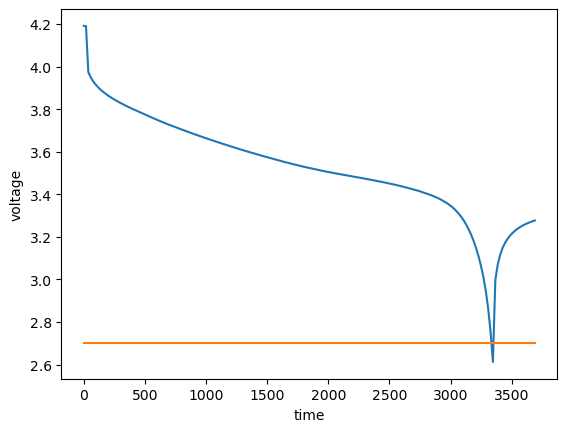

In [82]:
plt.xlabel("time")
plt.ylabel("voltage")
plt.plot(discharge['data'][0][0]['Time'][0], discharge['data'][0][0]['Voltage_measured'][0])
time_len = len(discharge['data'][0][0]['Time'][0])
plt.plot([0,discharge['data'][0][0]['Time'][0][time_len-1]], [2.7,2.7])


In [133]:
b5_cycle_arr = []
b5_cycle_arr = mat_b5['B0005'][0, 0]['cycle'][0,]
len(b5_cycle_arr)

616

In [134]:
print(b5_cycle_arr[0]['type'], cycle_arr[1]['type'])

['charge'] ['discharge']


In [135]:
b5_cycle_arr[0]['data'][0][0]['Voltage_measured'][0]

array([3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
       4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
       4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
       4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
       4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
       4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
       4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
       4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
       4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
       4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
       4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
       4.117245  , 4.11794271, 4.1186426 , 4.11943651, 4.12004755,
       4.12062053, 4.12120233, 4.12214376, 4.12223722, 4.12330381,
       4.12376399, 4.12442084, 4.12507381, 4.12567826, 4.12616805,
       4.12656627, 4.12731238, 4.12808141, 4.12845744, 4.12895

In [136]:
b5_cycle_arr[1]['data'][0][0]['Voltage_measured'][0]

array([4.19149181, 4.19074907, 3.97487091, 3.95171671, 3.93435249,
       3.92005844, 3.90790351, 3.89703572, 3.88747658, 3.87895859,
       3.87101598, 3.86347968, 3.85666051, 3.85001358, 3.84384191,
       3.83768798, 3.83193825, 3.82641444, 3.82109573, 3.81589666,
       3.81069682, 3.80583738, 3.80112163, 3.79629313, 3.79144891,
       3.78662469, 3.78206292, 3.7771754 , 3.77240629, 3.76793746,
       3.7632293 , 3.75851149, 3.75421321, 3.7496292 , 3.74516886,
       3.74100501, 3.73669983, 3.73248271, 3.72835255, 3.72453324,
       3.72065103, 3.71640901, 3.71279184, 3.70842761, 3.70479177,
       3.70068258, 3.69675771, 3.69303933, 3.6891768 , 3.68521448,
       3.68149374, 3.67779221, 3.67406181, 3.67030176, 3.66673391,
       3.66299805, 3.65966439, 3.65589414, 3.65232651, 3.64876348,
       3.64554686, 3.64207625, 3.63846406, 3.63507607, 3.63166482,
       3.62857854, 3.6250126 , 3.62158223, 3.61846125, 3.61506725,
       3.61188181, 3.60857868, 3.60553494, 3.6021859 , 3.59885

useless double array make complex </br>
**check voltage during discarge**

Text(0.5, 1.0, 'Discharge Voltage')

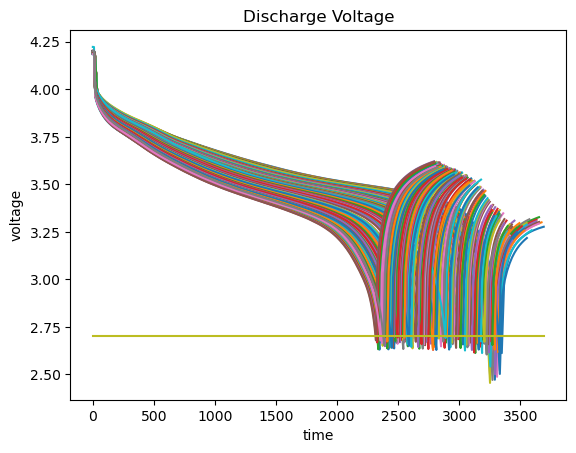

In [137]:
plt.xlabel("time")
plt.ylabel("voltage")

for i in range(len(cycle_arr)-1):
    if(b5_cycle_arr[i]['type'] == 'discharge'):
        plt.plot(b5_cycle_arr[i]['data'][0][0]['Time'][0], b5_cycle_arr[i]['data'][0][0]['Voltage_measured'][0])
        
time_len = len(b5_cycle_arr[1]['data'][0][0]['Time'][0])
plt.plot([0,b5_cycle_arr[1]['data'][0][0]['Time'][0][time_len-1]], [2.7,2.7])

plt.title('Discharge Voltage')

it looks data no problem </br>
**check voltage during charge**

Text(0.5, 1.0, 'Charge Voltage')

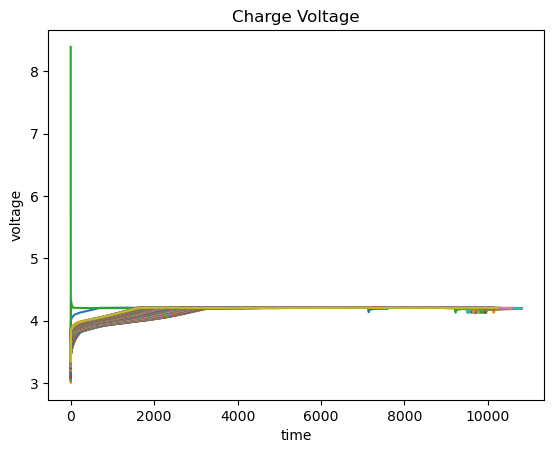

In [138]:
plt.xlabel("time")
plt.ylabel("voltage")

for i in range(len(cycle_arr)-1):
    if(b5_cycle_arr[i]['type'] == 'charge'):
        plt.plot(b5_cycle_arr[i]['data'][0][0]['Time'][0], b5_cycle_arr[i]['data'][0][0]['Voltage_measured'][0])

plt.title('Charge Voltage')

it looks strange
check them again in time scale up

Text(0.5, 1.0, 'Charge Voltage')

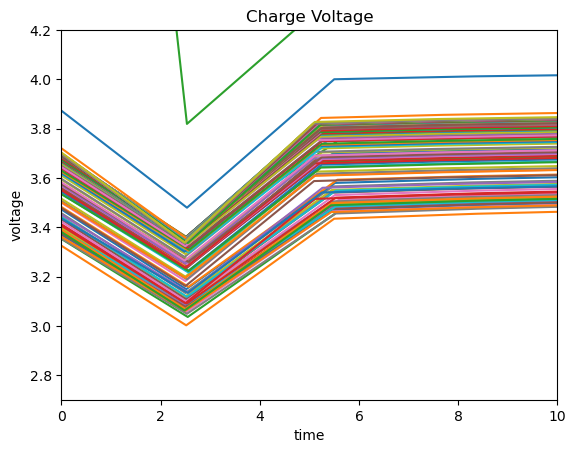

In [139]:
plt.xlabel("time")
plt.ylabel("voltage")

for i in range(len(b5_cycle_arr)-1):
    if(b5_cycle_arr[i]['type'] == 'charge'):
        plt.plot(b5_cycle_arr[i]['data'][0][0]['Time'][0], b5_cycle_arr[i]['data'][0][0]['Voltage_measured'][0])
plt.xlim(0, 10)
plt.ylim(2.7, 4.2)
plt.title('Charge Voltage')

Text(0.5, 1.0, 'Charge Voltage')

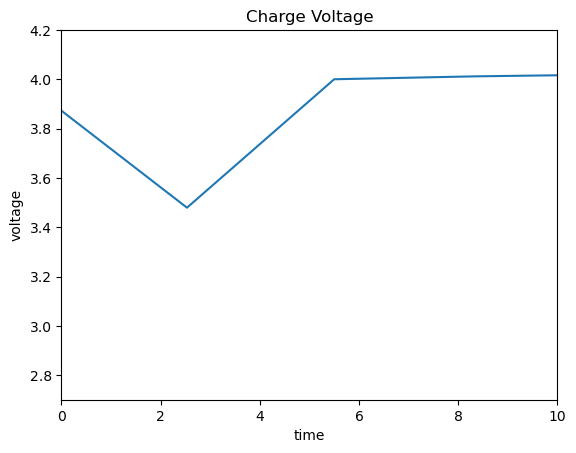

In [140]:
plt.xlabel("time")
plt.ylabel("voltage")


plt.plot(b5_cycle_arr[0]['data'][0][0]['Time'][0], b5_cycle_arr[0]['data'][0][0]['Voltage_measured'][0])
plt.xlim(0, 10)
plt.ylim(2.7, 4.2)
plt.title('Charge Voltage')

as shown voltage data during charging, I guess there was some experimental problems </br>
So, i cannot use the data during charging cycle